In [19]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import random
import math

In [20]:
a = np.random.normal(0, 1, size=1000)
print(a.var(ddof=0))
print(a.var(ddof=1)) # Несмещенная дисперсия
#print(stats.var(a, bias=False))

0.9664643349130276
0.9674317666797073


# Задание 1

In [21]:
mean_1 = 50
var_1 = 5
mean_2 = 1000
var_2 = 15

sample_1 = stats.norm.rvs(mean_1, var_1, size=1000)
sample_2 = stats.norm.rvs(mean_2, var_2, size=10)
combined_sample = np.concatenate((sample_1, sample_2))
print(f"Среднее выборки - {combined_sample.mean()}")
print(f"Медиана выборки - {np.median(combined_sample)}")
# Медиана, в отличии от среднего, почти не изменилась после появления аномальных значений в большой выборке, 
# поэтому она более устойчива по сравнению с выборочным средним

Среднее выборки - 59.32809157579069
Медиана выборки - 49.85702759329496


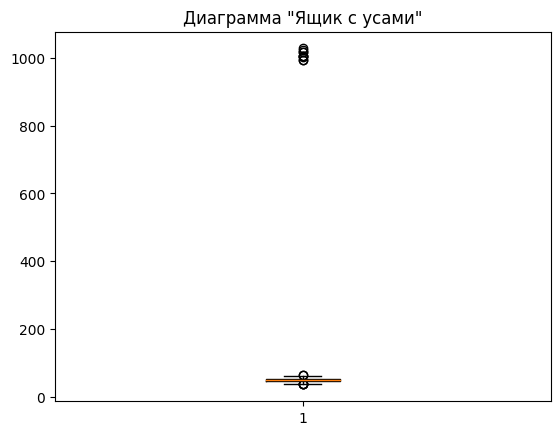

In [22]:
plt.boxplot(combined_sample)
plt.title('Диаграмма "Ящик с усами"')
plt.show()

# Задание 2

In [23]:
sizes = [10, 100, 1000]
biased = []
unbiased = []
mean = 50
var = 8
std = var ** 0.5
for size in sizes:
    biased.append([])
    unbiased.append([])
    for i in range(1000):
        # Из дисперсии извлекается корень, так как функция требует среднеквадратичное отклонение
        sample = stats.norm.rvs(mean, std, size)
        biased[-1].append(sample.var(ddof=0))
        unbiased[-1].append(sample.var(ddof=1))

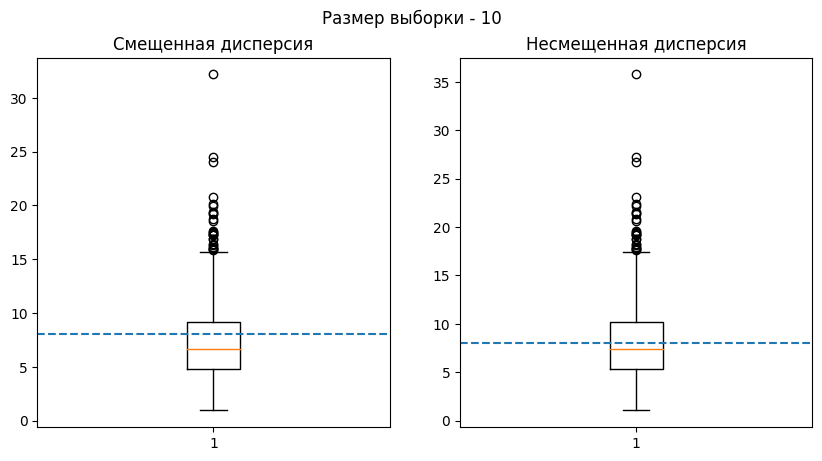

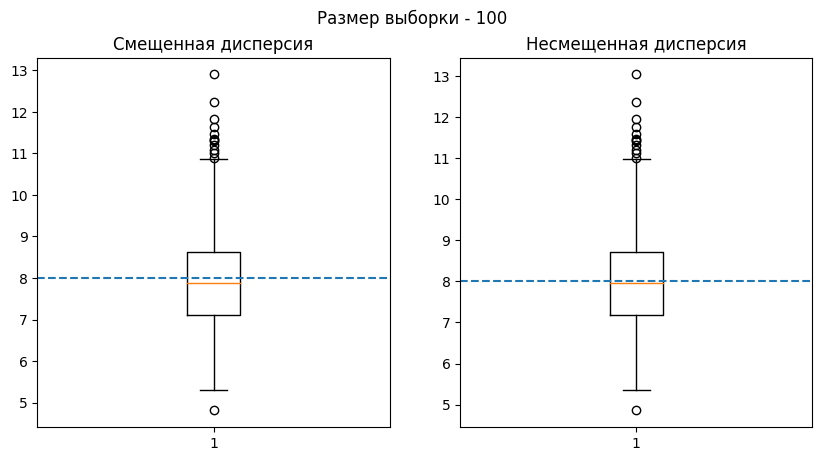

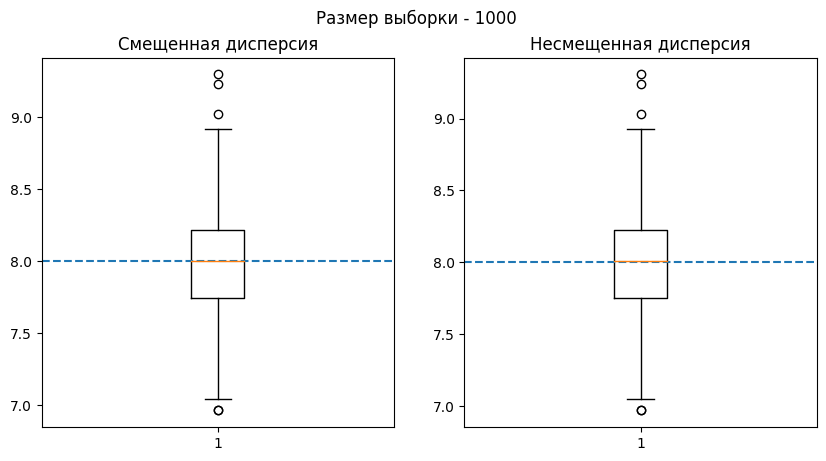

In [24]:
for a, b, size in zip(biased, unbiased, sizes):
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(10)
    fig.suptitle(f"Размер выборки - {size}")
    ax[0].boxplot(a)
    ax[0].axhline(var, linestyle = '--')
    ax[0].set_title("Cмещенная дисперсия")
    ax[1].boxplot(b)
    ax[1].axhline(var, linestyle = '--')
    ax[1].set_title("Несмещенная дисперсия")
    plt.show()

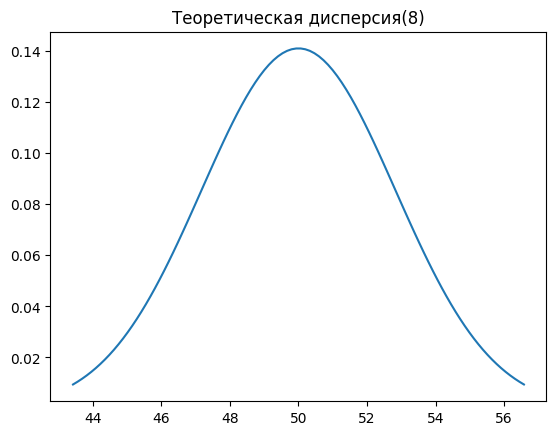

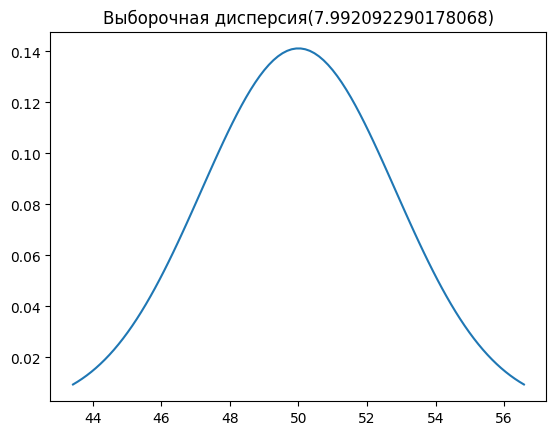

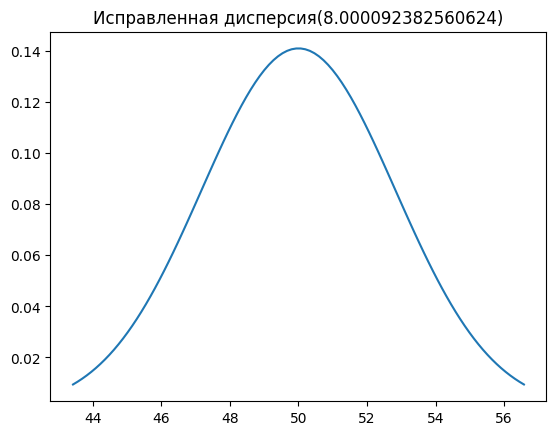

In [25]:
dispersions = {"Теоретическая дисперсия": var, "Выборочная дисперсия": sum(biased[-1])/len(biased[-1]), 
               "Исправленная дисперсия": sum(unbiased[-1])/len(biased[-1])}
for name, value in dispersions.items():
    std = value ** 0.5
    sample = np.linspace(stats.norm.ppf(0.01, loc=mean, scale=std), stats.norm.ppf(0.99, loc=mean, scale=std), 100)
    plt.plot(sample, stats.norm.pdf(sample, loc=mean, scale=std))
    plt.title(f"{name}({value})")
    plt.show()


# Задание 3

In [26]:
# Доверительный интервал для выборки размера 50
mean = 0
std = 1
sample = stats.norm.rvs(size=50, loc=mean, scale=std)
stats.t.interval(confidence=0.95, df=len(sample) - 1, loc=mean, scale=std)

(-2.009575234489209, 2.009575234489209)

In [27]:
# Сравнение доверительного интервала в зависимости от параметров
mean = 0
std = 1
confidence = 0.95
for size in range(100, 600, 100):
    sample = stats.norm.rvs(size=size, loc=mean, scale=std)
    interval = stats.t.interval(confidence=confidence, df=len(sample) - 1, loc=mean, scale=std)
    print(f"Размер выборки - {size}\nДоверительный интервал - [{interval[0]};{interval[1]}]\n_____________")

Размер выборки - 100
Доверительный интервал - [-1.9842169515086827;1.9842169515086827]
_____________
Размер выборки - 200
Доверительный интервал - [-1.971956544249395;1.971956544249395]
_____________
Размер выборки - 300
Доверительный интервал - [-1.9679296690653618;1.9679296690653618]
_____________
Размер выборки - 400
Доверительный интервал - [-1.965927295920809;1.965927295920809]
_____________
Размер выборки - 500
Доверительный интервал - [-1.9647293909876649;1.9647293909876649]
_____________


In [28]:
# Зависимость от дисперсии
mean = 0
confidence = 0.95
size = 500
for var in range(1, 11, 2):
    std = var ** 0.5
    sample = stats.norm.rvs(size=size, loc=mean, scale=std)
    interval = stats.t.interval(confidence=confidence, df=len(sample) - 1, loc=mean, scale=std)
    print(f"Дисперсия - {var}\nДоверительный интервал - [{interval[0]};{interval[1]}]\n_____________")

Дисперсия - 1
Доверительный интервал - [-1.9647293909876649;1.9647293909876649]
_____________
Дисперсия - 3
Доверительный интервал - [-3.403011128314493;3.403011128314493]
_____________
Дисперсия - 5
Доверительный интервал - [-4.393268475640181;4.393268475640181]
_____________
Дисперсия - 7
Доверительный интервал - [-5.198185362092749;5.198185362092749]
_____________
Дисперсия - 9
Доверительный интервал - [-5.894188172962995;5.894188172962995]
_____________


In [29]:
# Зависимость от уровня значимости
mean = 0
std = 1
size = 500
for confidence in [0.95, 0.96, 0.97, 0.98, 0.99]:
    sample = stats.norm.rvs(size=size, loc=mean, scale=std)
    interval = stats.t.interval(confidence=confidence, df=len(sample) - 1, loc=mean, scale=std)
    print(f"Уровень значимости - {confidence}\nДоверительный интервал - [{interval[0]};{interval[1]}]\n_____________")

Уровень значимости - 0.95
Доверительный интервал - [-1.9647293909876649;1.9647293909876649]
_____________
Уровень значимости - 0.96
Доверительный интервал - [-2.059131485826451;2.059131485826451]
_____________
Уровень значимости - 0.97
Доверительный интервал - [-2.1763148480423125;2.1763148480423125]
_____________
Уровень значимости - 0.98
Доверительный интервал - [-2.3338439936572812;2.3338439936572812]
_____________
Уровень значимости - 0.99
Доверительный интервал - [-2.58571768311148;2.58571768311148]
_____________


In [30]:
# Доверительный интервал по выборке средних

for size in [100, 500, 1000]:
    sample_means = []
    for i in range(1000):
        sample = stats.norm.rvs(size=size)
        sample_means.append(sample.mean())
    sample_means = np.array(sample_means)
    interval = stats.t.interval(confidence=confidence, df=len(sample_means) - 1, loc=sample_means.mean(), scale=sample_means.std())
    print(f"Размер выборки - {size}, доверительный интервал - {interval}")
    print(interval)

Размер выборки - 100, доверительный интервал - (-0.25738262426649594, 0.24281786358478305)
(-0.25738262426649594, 0.24281786358478305)


Размер выборки - 500, доверительный интервал - (-0.11701939795254598, 0.11542657073486381)
(-0.11701939795254598, 0.11542657073486381)
Размер выборки - 1000, доверительный интервал - (-0.08218072909964498, 0.08176441877353259)
(-0.08218072909964498, 0.08176441877353259)


# Задание 4

Размер выборки = 50
Среднее для выборки с повторениями = 0.012869131115319116
Среднее для выборки без повторений = 0.0002755501338113763
Доверительный интервал среднего для выборки без повторений(p = 0.95) - (-2.009575234489209, 2.009575234489209)
______________
Размер выборки = 1500
Среднее для выборки с повторениями = 0.009195150753316754
Среднее для выборки без повторений = 0.002450064209418
Доверительный интервал среднего для выборки без повторений(p = 0.95) - (-1.9615478106169348, 1.9615478106169348)
______________


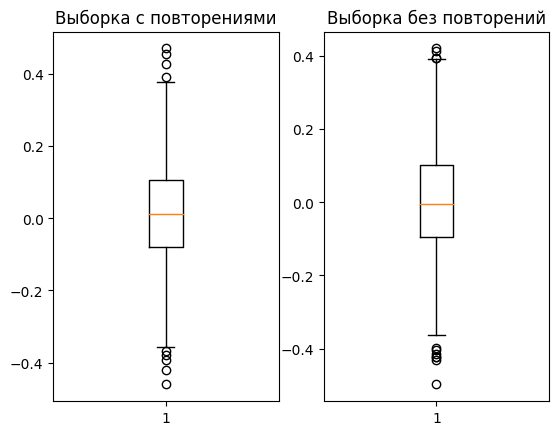

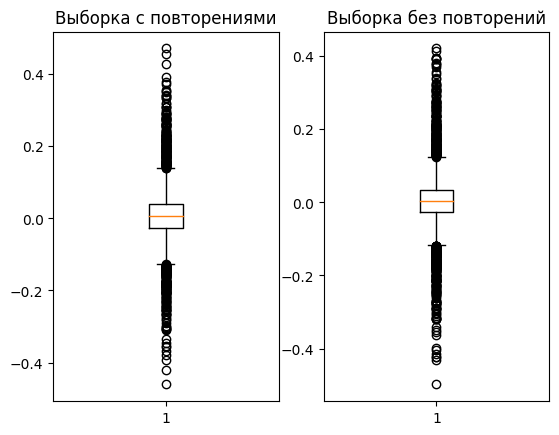

In [31]:
general = stats.norm.rvs(size=5000)
repeated_means = []
non_repeated_means = []
for size in [50, 1500]:
    print(f"Размер выборки = {size}")
    for i in range(1000):
        repeated_sample = np.random.choice(general, size=size, replace=True)
        repeated_means.append(repeated_sample.mean())
        non_repeated_sample = np.random.choice(general, size=size, replace=False)
        non_repeated_means.append(non_repeated_sample.mean())
    print(f"Среднее для выборки с повторениями = {sum(repeated_means)/len(repeated_means)}")
    print(f"Среднее для выборки без повторений = {sum(non_repeated_means)/len(non_repeated_means)}")
    fig, ax = plt.subplots(1, 2)
    ax[0].set_title("Выборка с повторениями")
    ax[0].boxplot(repeated_means)
    #ax[0].title
    ax[1].set_title("Выборка без повторений")
    ax[1].boxplot(non_repeated_means)
    print(f"Доверительный интервал среднего для выборки без повторений(p = 0.95) - {stats.t.interval(confidence=0.95, df=size-1)}")
    print(f"______________")
plt.show()

# Задание 5

In [32]:
sample = stats.norm.rvs(size=1000, loc=30, scale=2)
mean = sample.mean()
var = sample.var()

means = list(range(0,100, 5))
vars = list(x/10 for x in range(10, 110, 5))

In [33]:
def norm_loglikelihood(sample, mean=0, std=1):
    return sum(stats.norm.logpdf(sample, loc=mean, scale=std))

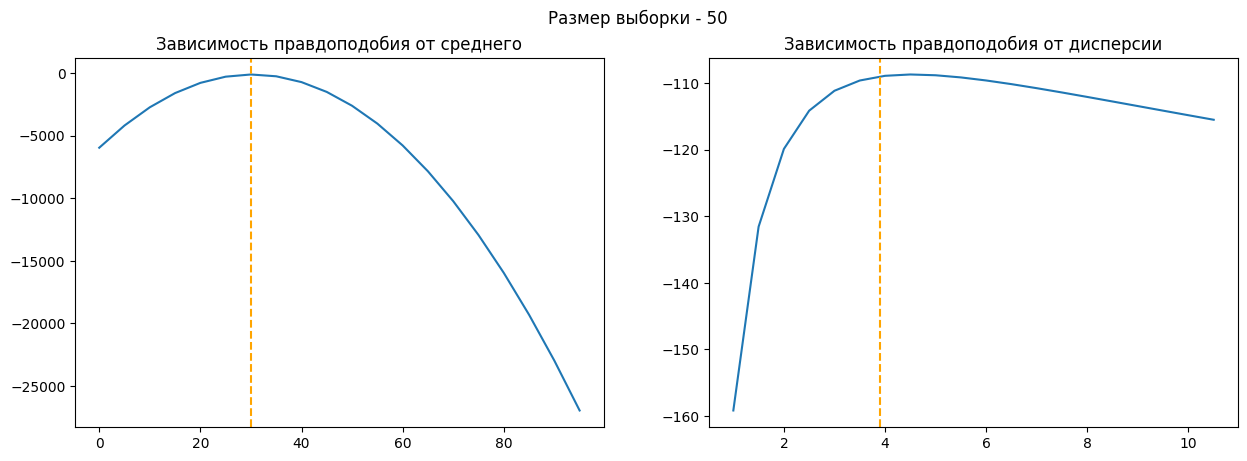

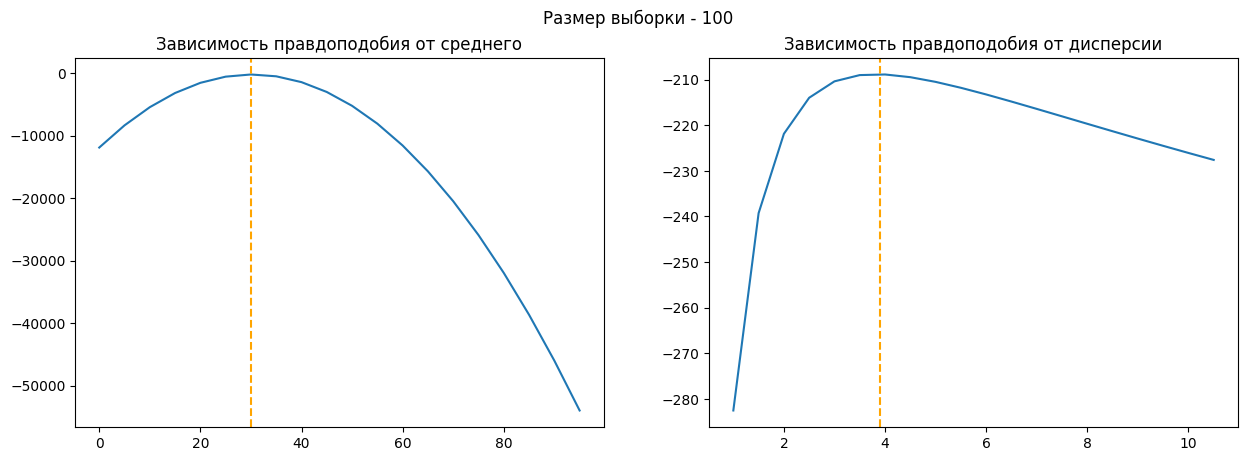

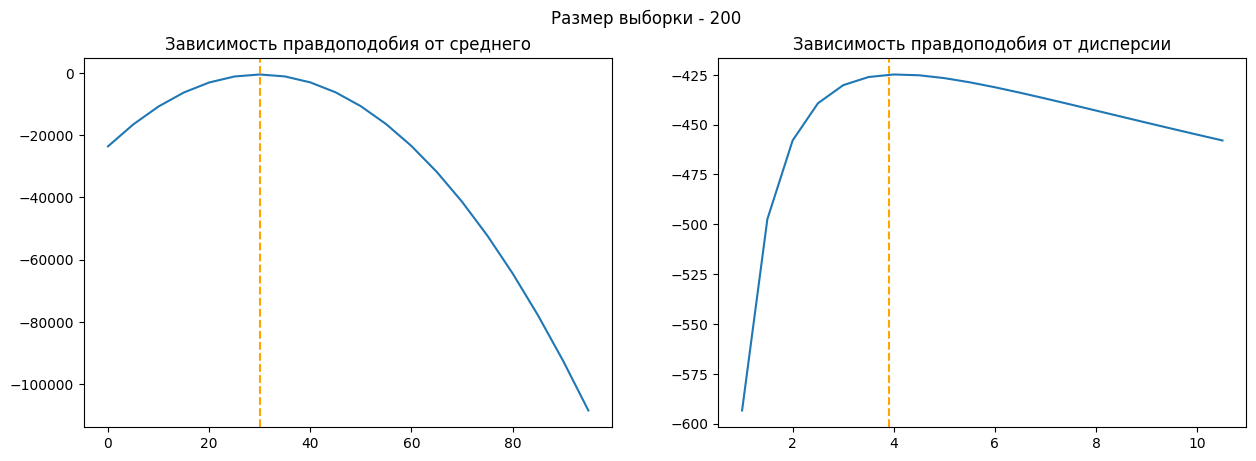

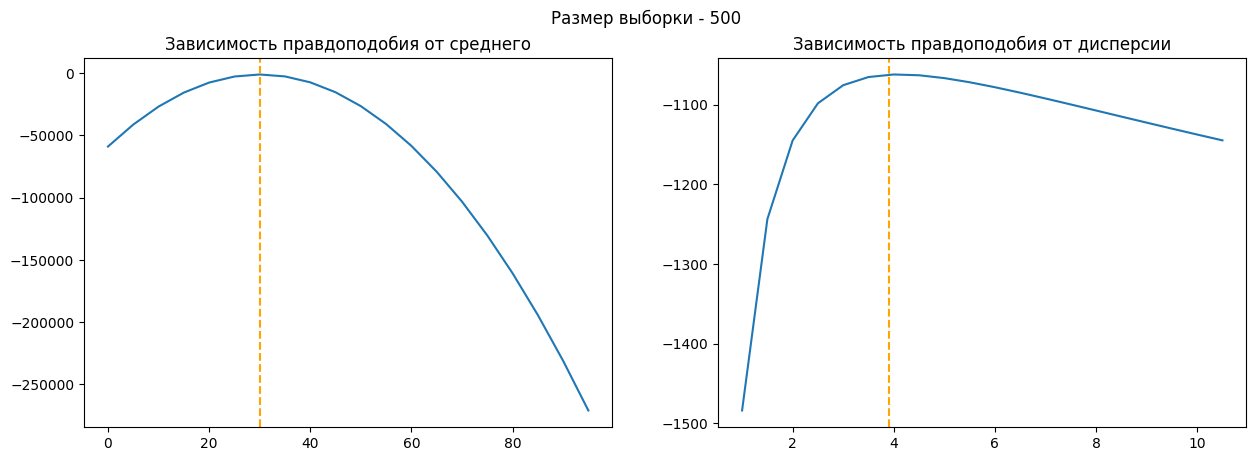

In [34]:
for size in [50, 100, 200, 500]:
    
    means_likelihood = [norm_loglikelihood(sample[:size], x, var ** 0.5) for x in means]
    vars_likelihood = [norm_loglikelihood(sample[:size], mean, x ** 0.5) for x in vars]

    fig, ax = plt.subplots(1, 2, )
    fig.set_figwidth(15)
    fig.suptitle(f"Размер выборки - {size}")
    ax[0].set_title("Зависимость правдоподобия от среднего")
    ax[0].plot(means, means_likelihood)
    ax[0].axvline(mean, linestyle = '--', color='orange') # Реальное среднее
    ax[1].set_title("Зависимость правдоподобия от дисперсии")
    ax[1].plot(vars, vars_likelihood) # Реальная дисперсия
    ax[1].axvline(var, linestyle = '--', color='orange')
    plt.show()


In [35]:
means_likelihood = [norm_loglikelihood(sample, x, var ** 0.5) for x in means]
vars_likelihood = [norm_loglikelihood(sample, mean, x ** 0.5) for x in vars]

best_mean = max(zip(means, means_likelihood), key=lambda x: x[1])[0]
best_var = max(zip(vars, vars_likelihood), key=lambda x: x[1])[0]

print("Сравнение значений, полученных функцией правдоподобия, с реальными значениями")
print(f"Среднее - {best_mean}, Реальное среднее - {mean}")
print(f"Дисперсия - {best_var}, Реальная дисперсия - {var}")

Сравнение значений, полученных функцией правдоподобия, с реальными значениями
Среднее - 30, Реальное среднее - 29.995042687183712
Дисперсия - 4.0, Реальная дисперсия - 3.903309854309324


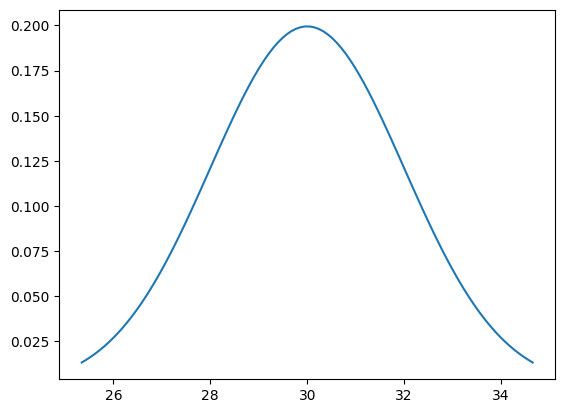

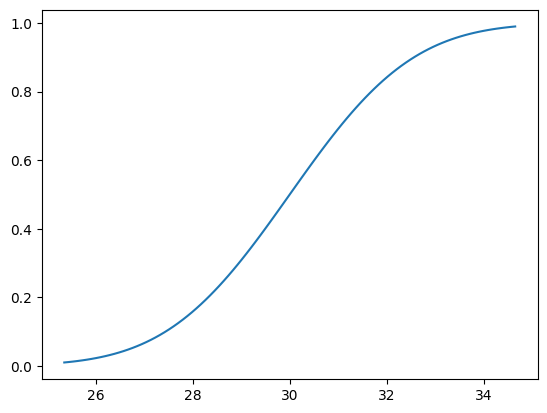

In [36]:
linspace = np.linspace(stats.norm.ppf(0.01, loc=best_mean, scale=best_var ** 0.5), stats.norm.ppf(0.99, loc=best_mean, scale=best_var ** 0.5), 100)
plt.plot(linspace, stats.norm.pdf(linspace, loc=best_mean, scale=best_var ** 0.5))
plt.show()

plt.plot(linspace, stats.norm.cdf(linspace, loc=best_mean, scale=best_var ** 0.5))
plt.show()